In [41]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib
import math
from matplotlib import colors as mcolors
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [43]:
# Load the txt-files with with stats from the st-pipeline

path = '../../smomics_data'

filez = ['10015CN108_C1_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt',
         '10015CN108fl_E2_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt',
         '5005CN107_D2_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt',
        'visium_A1_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt', 
        'visium_B1_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt', 
        'visium_D1_uniq_molecules_after_seq_depth_in_spots_under_tissue.txt']

sample_type = {'visium_A1':'Visium',
              'visium_B1':'Visium',
               'visium_D1':'Visium',
              '10015CN108_C1': 'sm-omics',
              '10015CN108fl_E2': 'sm-omics',
              '5005CN107_D2': 'sm-omics'}

spots_under_tissue = {'visium_A1':3262,
              'visium_B1':2897,
               'visium_D1':3426,
              '10015CN108_C1': 680,
              '10015CN108fl_E2': 563,
            '5005CN107_D2':700}

spot_radium = {'visium_A1':27.5,
              'visium_B1':27.5,
               'visium_D1':27.5,
              '10015CN108_C1': 50,
              '10015CN108fl_E2': 50,
            '5005CN107_D2':50}

stats_list = []

prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

for file in filez:
    filename = os.path.join(path, file)
    
    cond_file = pd.read_csv(filename, sep = '\t')
    print(cond_file)
         
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list        
    cond_file['type'] = sample_type[cond_file['Name'][0]]
    
    # normalize uniq counts with # spots under tissue
    cond_file['norm uniq mol'] = cond_file['Unique_molecules']/spots_under_tissue[cond_file['Name'][0]]
        
    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    
print(cond_merge.head())

# Print max value (at  Prop_annot_reads == 1)
print(cond_merge[cond_merge['Prop_annot_reads'] == 1])

            Name  Unique_molecules  Num reads
0  10015CN108_C1         1187182.0    4498459
1  10015CN108_C1         1187621.0   16217182
2  10015CN108_C1          712155.0    2545338
3  10015CN108_C1          426990.0    1568778
4  10015CN108_C1          140275.0     611749
5  10015CN108_C1         1187208.0    8404700
6  10015CN108_C1          190910.0     787530
7  10015CN108_C1         1187553.0   20123423
8  10015CN108_C1         1187741.0   12310941
              Name  Unique_molecules  Num reads
0  10015CN108fl_E2         1525414.0    6033647
1  10015CN108fl_E2         1568905.0   59887074
2  10015CN108fl_E2          767005.0    3041790
3  10015CN108fl_E2         1569406.0   23984790
4  10015CN108fl_E2         1569045.0   47919646
5  10015CN108fl_E2          124581.0     648305
6  10015CN108fl_E2         1568962.0   12017361
7  10015CN108fl_E2         1568905.0   35952218
8  10015CN108fl_E2           12643.0     109771
           Name  Unique_molecules  Num reads
0  5005CN107_D2

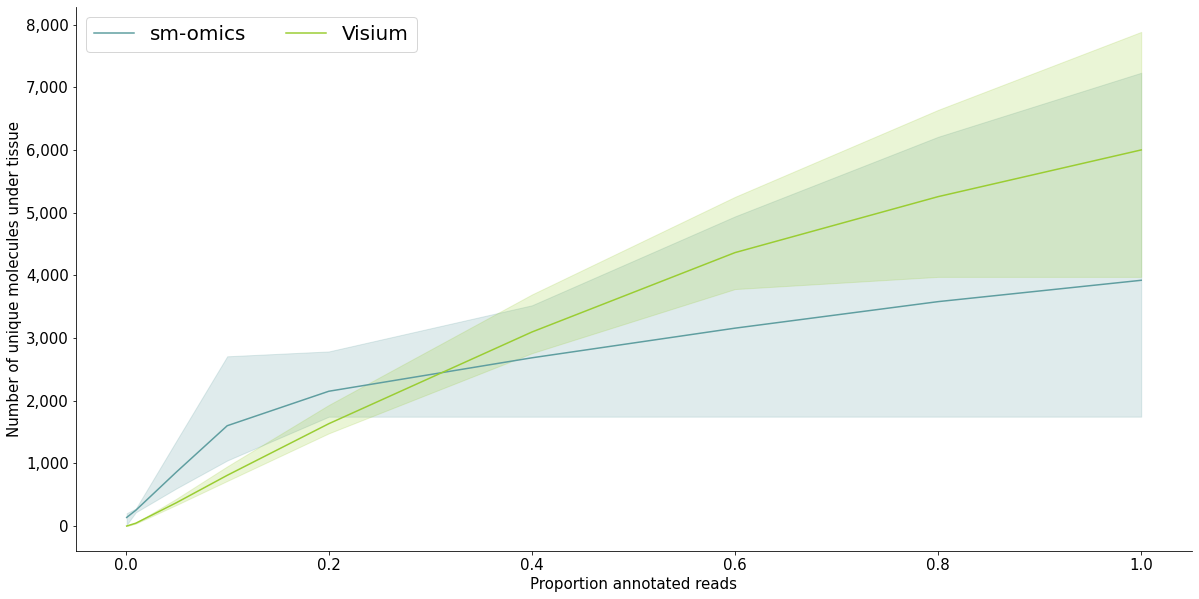

In [44]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol"
hue='type'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette = ['cadetblue', 'yellowgreen'], hue_order = ['sm-omics', 'Visium'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'Visium'],loc='upper left', ncol=2, fontsize=20)


# fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_visium_total_umis.pdf", transparent=True, bbox_inches = 'tight',
#     pad_inches = 0, dpi=1200)
plt.show()

In [45]:
cond_merge['Prop_annot_reads'] = 100*cond_merge['Prop_annot_reads']

In [46]:
cond_merge.to_csv('../../smomics_data/sm_visium_unique_molecules.csv')